## More from arch

_This setup code is required to run in an IPython notebook_

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [47]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://localhost', connect_args={'read_default_file': '~/.mytest.cnf'})
conn = engine.connect()

In [48]:
import pandas as pd

SQL_query = pd.read_sql_query(
    '''select tradedate, pct_close from USEQ_HIST where symbol="MS"
    and volume>0
     order by tradedate''',
    conn,
    index_col='tradedate'
)
df = pd.DataFrame(SQL_query, columns=["pct_close"])

df.head()

,pct_close
tradedate,
2016-01-04,-1.03741
2016-01-05,-0.63532
2016-01-06,-2.49361
2016-01-07,-4.98361
2016-01-08,-2.07039


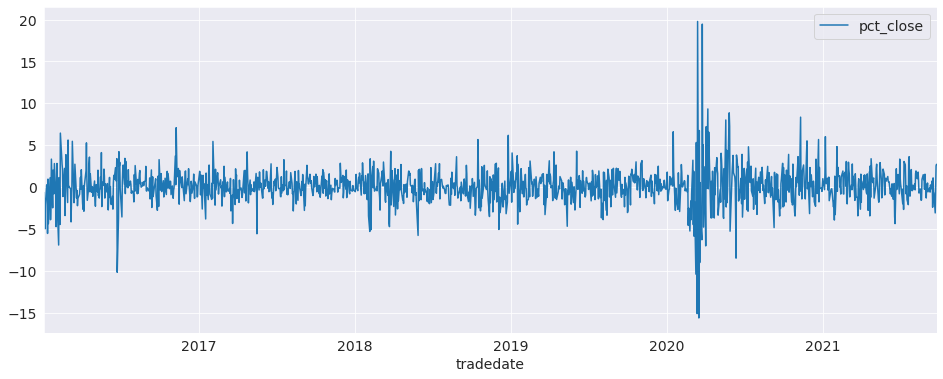

In [49]:
ax = df.plot()
xlim = ax.set_xlim(df.index.min(), df.index.max())

In [50]:
from arch import arch_model

## GJR-Garch with Student's T

In [51]:
am = arch_model(df, p=1, o=1, q=1, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     47,   Neg. LLF: 2813.1207662251904
Iteration:     10,   Func. Count:     92,   Neg. LLF: 2808.148689129385
Iteration:     15,   Func. Count:    136,   Neg. LLF: 2807.594034869071
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2807.591628440884
            Iterations: 18
            Function evaluations: 160
            Gradient evaluations: 18
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                    pct_close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2807.59
Distribution:      Standardized Student's t   AIC:                           5627.18
Method:                  Maximum Likelihood   BIC:                           5658.82
                                              No. Observations

`plot()` can be used to quickly visualize the standardized residuals and conditional volatility.


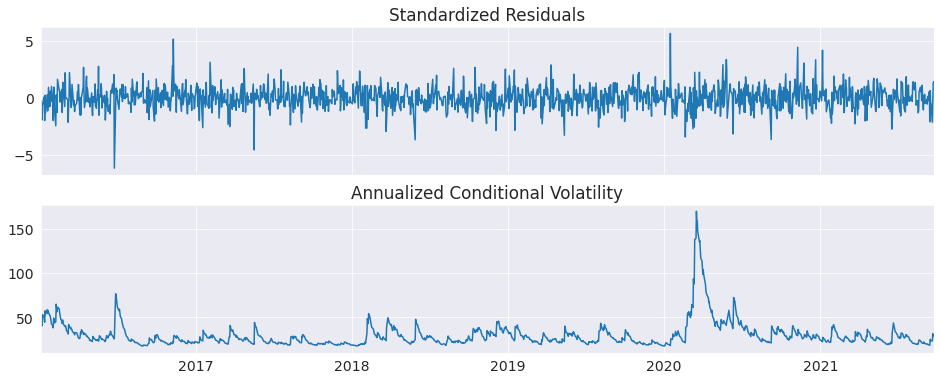

In [52]:
fig = res.plot(annualize="D")

## Parameters


In [53]:
res.params

mu          0.080703
omega       0.154605
alpha[1]    0.032404
gamma[1]    0.167435
beta[1]     0.849026
nu          5.516509
Name: params, dtype: float64

## Forecasts

In [54]:
forecasts = res.forecast(reindex=False)
print(forecasts.mean.iloc[-3:])

forecasts = res.forecast(horizon=10, reindex=False)
print(forecasts.residual_variance.iloc[-3:])



                 h.1
tradedate           
2021-09-23  0.080703
               h.01      h.02     h.03      h.04      h.05      h.06  \
tradedate                                                              
2021-09-23  3.24573  3.287213  3.32725  3.365892  3.403187  3.439183   

                h.07      h.08      h.09      h.10  
tradedate                                           
2021-09-23  3.473924  3.507453  3.539815  3.571048  
